### Exercise 2 - Numerical Optimization

Consider the following nonlinear optimization problem
<img src="imgs/nlp.png" alt="nlp" width="350"/>


Compute the gradients of the objective $f(x, y) = \frac{1}{2}(x-1)^2 + \frac{1}{2}(10(y - x^2))^2 + \frac{1}{2}x^2$ and the constraints $g(x, y) = x + (1-y)^2$ and their Hessian on paper.
Write down on paper the Karush-Kuhn-Tucker (KKT) conditions for the above problem. Are these
conditions necessary for optimality? Are they sufficient?

Gradient of $f(x, y)$

$
\nabla f(x,y) = 
 \begin{bmatrix} 
2x -1 - 200 xy + 200 x^3 \\ 
100y - 100x^2 
\end{bmatrix}
$

Hessian of $f(x, y)$

$
\nabla^2 f(x,y) = \begin{bmatrix}
2 - 200y + 600 x^2 & -200x \\ -200 x & 100
\end{bmatrix}
$

Gradient of $g(x, y)$

$
\nabla g(x,y) 
= \begin{bmatrix}
1 \\ -2 + 2y 
\end{bmatrix}
$

Hessian of $g(x, y)$

$
\nabla^2 g(x,y) = 
\begin{bmatrix}
0 & 0 \\ 0 & 2
\end{bmatrix}
$ 

          

Lagrangian for this problem: $\mathcal{L}(x,y,\lambda) = f(x,y) + \lambda^\top g(x,y)$, $\lambda \in \mathbb{R}$

KKT conditions (first order necessary conditions):
\begin{align*}
\nabla_{(x,y)} \mathcal{L}(x^*,y^*,\lambda^*) = \nabla f(x^*,y^*) + \nabla g(x^*,y^*) \lambda^*  &= 0 \\
g(x^*,y^*) &= 0
\end{align*}

If LICQ holds at $(x^*, y^*)$, the KKT conditions are necessary conditions for optimality, but in general not sufficient.

If the problem is additionally convex, they are also sufficient. The given specific problem is not convex, therefore they are not sufficient.

Define CasADi functions for $f$ and $g$ and use CasADi to generate the gradient and hessian functions of these two functions.

In [1]:
import numpy as np
from casadi import SX, Function, sin

x = SX.sym('x')
y = SX.sym('y')

f = 0.5*(x-1)**2 + 0.5*(10*(y-x**2))**2 + 0.5*x**2
g = x + (1-y)**2

print(f)

@1=0.5, (((@1*sq((x-1)))+(@1*sq((10*(y-sq(x))))))+(@1*sq(x)))


In [2]:
from casadi import Function

f_fun = Function('f', [x, y], [f])
g_fun = Function('g', [x, y], [g])

In [3]:
g_fun

Function(g:(i0,i1)->(o0) SXFunction)

In [4]:
g_fun(0, 0).full()

array([[1.]])

In [5]:
from casadi import vertcat, jacobian, hessian

z = vertcat(x, y)
J_f = jacobian(f, z)
J_g = jacobian(g, z)

In [6]:
H_f, J_f = hessian(f, z)
H_g, J_g = hessian(g, z)

In [7]:
H_g_fun = Function('H_g', [z], [H_g])

In [8]:
J_f_fun = Function('J_f', [x, y], [J_f])
J_f_fun(1, 1).full()

array([[1.],
       [0.]])

Solve the above constrained optimization problem using CasADi using the solver `IPOPT`.

In [9]:
from casadi import nlpsol

nlp = {'x':z, 'f':f, 'g':g}

# opts = {'ipopt':{'fixed_variable_treatment':'make_constraint'}}

# solver = nlpsol('solver', 'ipopt', nlp, opts)
solver = nlpsol('solver', 'ipopt', nlp)

print(solver)

solver:(x0[2],p[],lbx[2],ubx[2],lbg,ubg,lam_x0[2],lam_g0)->(x[2],f,g,lam_x[2],lam_g,lam_p[]) IpoptInterface


In [10]:
r = solver(x0=[-1, 1], lbg=0, ubg=0)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

In [11]:
r

{'f': DM(1.29347),
 'g': DM(9.00391e-14),
 'lam_g': DM(0.817188),
 'lam_p': DM([]),
 'lam_x': DM([0, 0]),
 'x': DM([-0.51811, 0.280202])}

In [12]:
x_opt = r['x']
lam_g_opt = r['lam_g']

print('x_opt: ', x_opt)

x_opt:  [-0.51811, 0.280202]


(-2.0, 2.0)

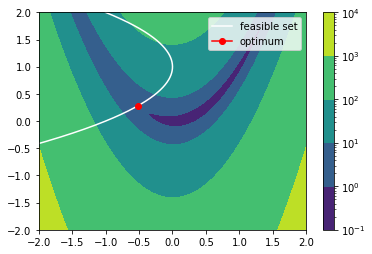

In [13]:
import matplotlib.pyplot as plt
from matplotlib import ticker

xlims = (-2, 2)
ylims = (-2, 2)
xs = np.linspace(xlims[0], xlims[1], 500)
ys = np.linspace(ylims[0], ylims[1], 500)
X, Y = np.meshgrid(xs, ys)

Z = 0.5*(X-1)**2 + 0.5*(10*(Y-X**2))**2 + 0.5*X**2

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, locator=ticker.LogLocator())
plt.colorbar(CS)

feasible_x = -(1-ys)**2

plt.plot(feasible_x, ys, color='w', label='feasible set')
plt.plot(x_opt[0], x_opt[1], color='r', marker='o', label='optimum')
plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)

Make sure that the KKT conditions are satisfied at the solution that you obtain.

In [14]:
# solver.get_function()
solver.get_function('nlp_grad')

Function(nlp_grad:(x[2],p[],lam_f,lam_g)->(f,g,grad_gamma_x[2],grad_gamma_p[]) SXFunction)

In [15]:
nlp_grad = solver.get_function('nlp_grad')
nlp_grad(x_opt, [], 1, lam_g_opt)

(DM(1.29347), DM(9.00391e-14), DM([-3.34108e-11, 2.39859e-11]), DM([]))

In [16]:
g_fun(x_opt[0], x_opt[1])

DM(9.00391e-14)